In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
# drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


TRAINING

In [ ]:
import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

# !ls '/content/gdrive/MyDrive/DLP Project/4_Emotion_Detection/'

df=pd.read_csv('/content/gdrive/MyDrive/DLP Project/4_Emotion_Detection/fer2013.tar.gz (Unzipped Files)/fer2013/fer2013.csv')
df

In [ ]:
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")


num_features = 64
num_labels = 7
batch_size = 64
epochs = 200
width, height = 48, 48


X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

# print(f"shape:{X_train.shape}")
##designing the cnn
#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

# model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

#Training the model
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)


#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

Epoch 1/200
449/449 [==============================] - 53s 21ms/step - loss: 1.7868 - accuracy: 0.2605 - val_loss: 1.5645 - val_accuracy: 0.3895
Epoch 2/200
449/449 [==============================] - 8s 18ms/step - loss: 1.5510 - accuracy: 0.3831 - val_loss: 1.3976 - val_accuracy: 0.4444
Epoch 3/200
449/449 [==============================] - 8s 18ms/step - loss: 1.4298 - accuracy: 0.4401 - val_loss: 1.3324 - val_accuracy: 0.4759
Epoch 4/200
449/449 [==============================] - 9s 19ms/step - loss: 1.3455 - accuracy: 0.4809 - val_loss: 1.2821 - val_accuracy: 0.5032
Epoch 5/200
449/449 [==============================] - 8s 18ms/step - loss: 1.2966 - accuracy: 0.4978 - val_loss: 1.2365 - val_accuracy: 0.5230
Epoch 6/200
449/449 [==============================] - 8s 18ms/step - loss: 1.2497 - accuracy: 0.5214 - val_loss: 1.2514 - val_accuracy: 0.5208
Epoch 7/200
449/449 [==============================] - 8s 18ms/step - loss: 1.2226 - accuracy: 0.5333 - val_loss: 1.2026 - val_accuracy

# TESTING

--> angry: 0.01%
--> disgust: 0.00%
--> fear: 0.86%
--> happy: 96.79%
--> sad: 0.18%
--> surprise: 0.58%
--> neutral: 1.58%


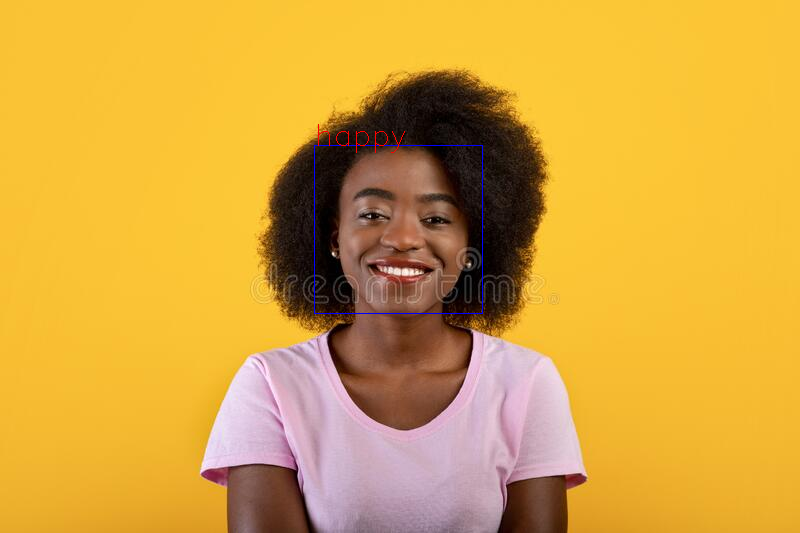

<function destroyAllWindows>

In [ ]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

from google.colab.patches import cv2_imshow

#load model
model = model_from_json(open("/content/gdrive/MyDrive/DLP Project/4_Emotion_Detection/fer.json", "r").read())
#load weights
model.load_weights('/content/gdrive/MyDrive/DLP Project/4_Emotion_Detection/fer.h5')


face_haar_cascade = cv2.CascadeClassifier('/content/gdrive/MyDrive/DLP Project/4_Emotion_Detection/haarcascade_frontalface_default.xml')


# test_img = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/31ee72c875e41d4585542024c820c687.jpg')
# test_img = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/Female_Emotions_732x549-thumbnail.jpg')
# test_img = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/depositphotos_19353231-stock-photo-very-sad-man.jpg')
# test_img = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/download.jpg')
# test_img = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/tumblr_inline_plfjp2KZNe1sq56mk_400.jpg')
test_img = cv2.imread('/content/gdrive/MyDrive/DLP Project/Test_Image/happy-person-portrait-friendly-black-woman-curly-hair-looking-camera-smiling-posing-over-yellow-background-perfect-217303617.jpg')





gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

for (x,y,w,h) in faces_detected:
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0))
    roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
    roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

    img_pixels = image.img_to_array(roi_gray)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255

    predictions = model.predict(img_pixels)
    # print(">>", predictions[0])

    #find max indexed array
    max_index = np.argmax(predictions[0])

    emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    predicted_emotion = emotions[max_index]

    for (i, (emotion, prob)) in enumerate(zip(emotions,  predictions[0])):
            # construct the label text
            text = "{}: {:.2f}%".format(emotion, prob * 100)
            print("-->", text)

    cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255))

# resized_img = cv2.resize(test_img, (1000, 700))
# cv2_imshow(gray_img)
cv2_imshow(test_img)
cv2.waitKey(0)
cv2.destroyAllWindows

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/depositphotos_19353231-stock-photo-very-sad-man.jpg')
cv2_imshow(image)